##Today's Agenda:
- Sklearn for <u>Support Vector Classification</u> (SVC) and <u>Support Vector Regression</u> (SVR)

- Linear SVM classification on the Moon Dataset (Not linearly sperable)

   Figure: Moon Dataset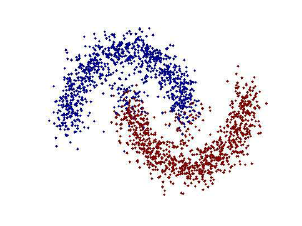
- Non-linear SVM classification (with polynomial, RBF kernel and different hyper-parameters) on the Moon Dataset
- Applying SVC to the IRIS dataset with several kernels (and hyper-parameter tuning)
- SVR on a toy dataset


## Support Vector Classification (SVC) & Regression (SVR)

## class sklearn.svm.SVC( C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,......)

- <b>C :float, default=1.0 </b>

<u>Cost Function</u>(soft margin svm): W, b = argmax (2 / |W|) + <b> C </b> 1/n* (summation of all zeta's) s.t. .....


<i>In words :find best w's and b's to : </i>  which Maximize the margin (2 / |W|) between classes & minimize the avg distance of misclassified points from correct hyperplane (zeta)

{ Where , W: Normal to the plane ,

  C : Regularization parameter.it tells us about trade off between bias and variance ,

 Zeta tells : "How much a misclassified point is further away from correct hyperplane in incorrect direction ?" }

Zeta >= 0 for all misclassified points , So,here we want to minimize (summation of all zeta's)


if C is large ----> tendency to make mistake minimizes on Dtrain ----> High Variance ----> Overfit &
if C is low   ----> High Bias ---- > Underfit

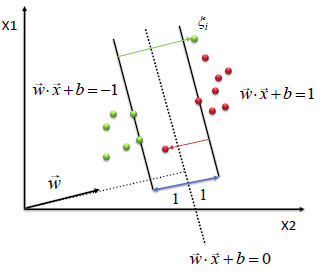


- <b>kernel</b> {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’},<b> default=’rbf’ </b>

<u>Kernelization:</u> d - dim (not linearly seperable) -----(kernel trick/FT)----> d'-dim (linearly seperable),d<<d'


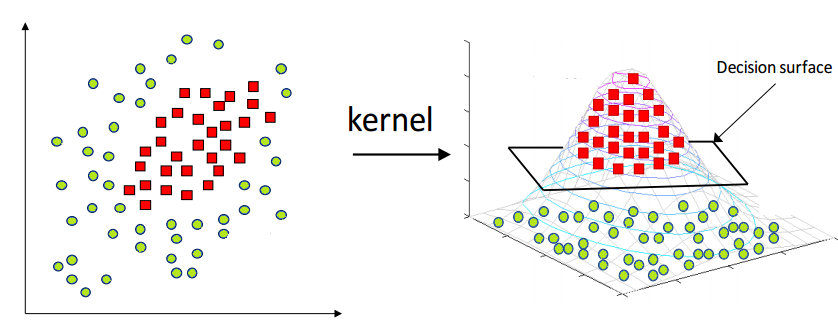

<b> RBF:</b> if d=0,k(sim) =1 , if d increases, k decreases exponentially ,e.g. d(x1,x2) = large , k = 0 ---->distance = large

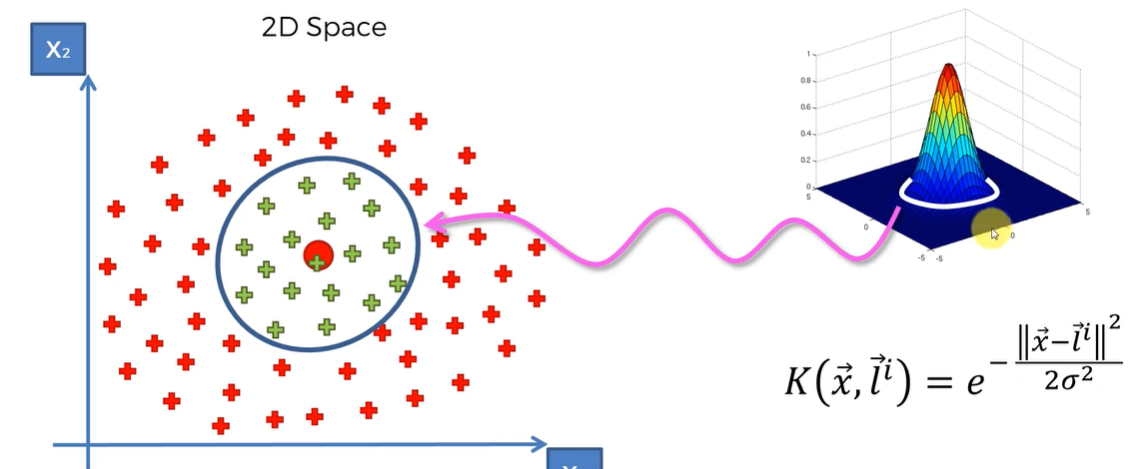

- <b> degree: int, default=3 </b>

Degree of the polynomial kernel function (iff ‘poly’). Ignored by all other kernels.

- <b> gamma: {‘scale’, ‘auto’} or float, default=’scale’ </b>

Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

<i>auto:</i> it will try to figure out what is the right gamma automatically

<i> gamma = 1 / 2*sigma^2 </i> : controls the size of the radial basis function kernel

- <b> coef0:float, default=0.0 </b>

Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

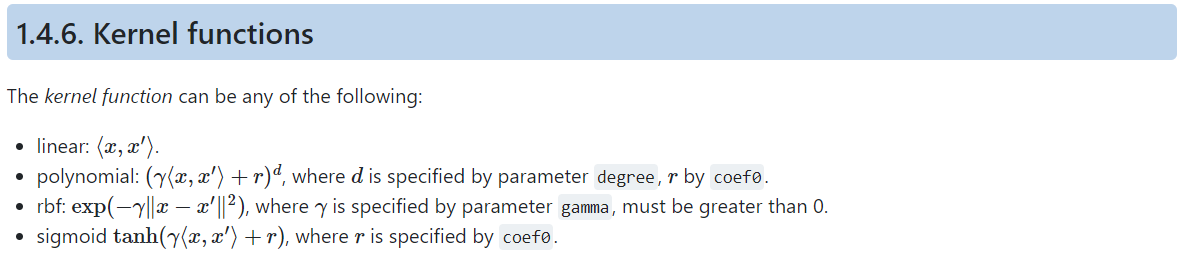
<b> Source:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## class sklearn.svm.SVR( kernel='rbf', degree=3, gamma='scale',......)

<b> Source :</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Linear SVM classification on the Moon dataset



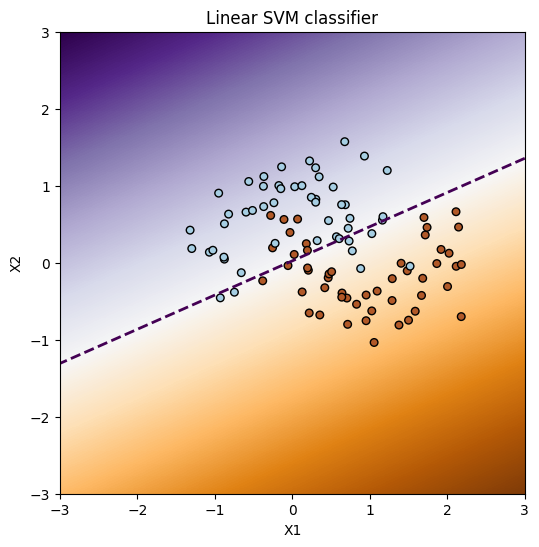

In [ ]:
# create moon data using make_moons function
X, y =  make_moons(noise=0.3, random_state=0)

#This line creates a grid of points spanning from -3 to 3 along both the x-axis (xx) and y-axis (yy). It uses np.meshgrid to create a grid of coordinates.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

#This code sets up a pipeline for the classification task.
#It first scales the data using StandardScaler() and then applies a linear Support Vector Machine (SVM) classifier with parameters specified (kernel='linear' and C=5).
clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel= "linear", C=5))   #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
])

clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) #It reshapes the output to have the same shape as the meshgrid.
plt.figure(figsize=(6,6))
#Sets up a figure with a specific size and displays the decision function values (Z) as an image using imshow()
plt.imshow(                         #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    Z, #contains the decision function values for each point in the meshgrid.
    interpolation="nearest",  # the interpolation method used to display the image. In this case, "nearest" means that the value of the nearest pixel is used for interpolation.
    extent=(xx.min(), xx.max(), yy.min(), yy.max()), #This parameter sets the data limits for the x- and y-axes. xx.min(), xx.max(), yy.min(), yy.max() are used to set the extent based on the minimum and maximum values of the meshgrid along the x- and y-axes.
    aspect="auto", #This parameter controls the aspect ratio of the plot.
    origin="lower", #In this case, "lower" means that the origin is at the lower left corner of the plot.
    cmap=plt.cm.PuOr_r, #colormap in reverse, which is a perceptually uniform colormap ranging from purple to orange.
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed") # For the the decision boundary
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k") # to plot the data points
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Non-Linear SVM Classification on the Moon dataset

### Polynimoal Kernel ( with degree=3, coef0=1, C=5)

In [ ]:
# plot the decision function for each datapoint on the grid
def decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,title):
    Z = poly_kernel_svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )

    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
    plt.axis([-3, 3, -3, 3])
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

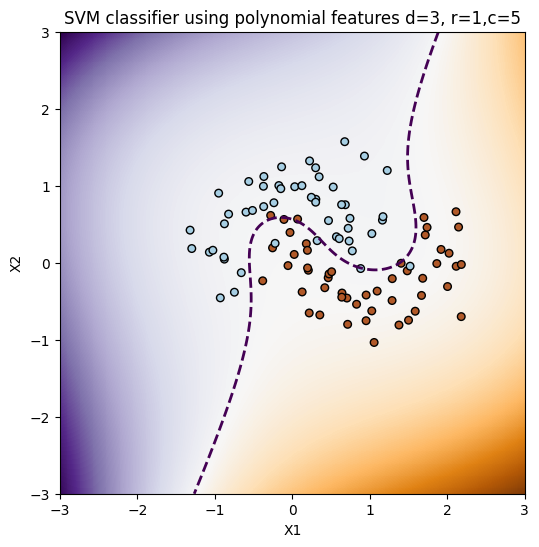

In [ ]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500)) #This line creates a grid of points spanning from -3 to 3 along both the x-axis (xx) and y-axis (yy)
np.random.seed(0)

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,'SVM classifier using polynomial features d=3, r=1,c=5')

### Polynimoal Kernel ( with degree=10, coef0=10, C=5)

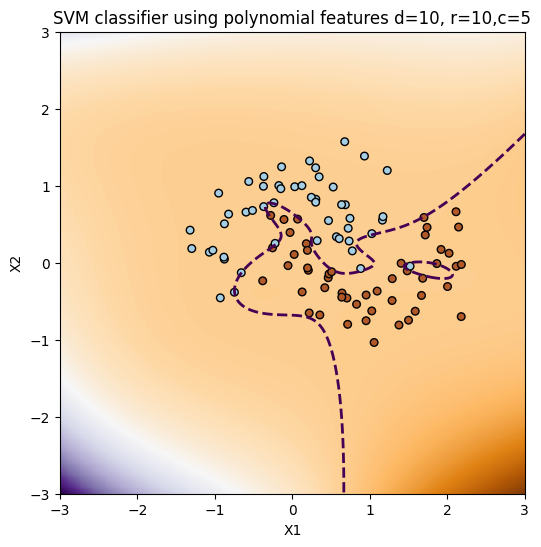

In [ ]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=10, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,'SVM classifier using polynomial features d=10, r=10,c=5')

### RBF Kernel ( with gamma=5, C=0.001)

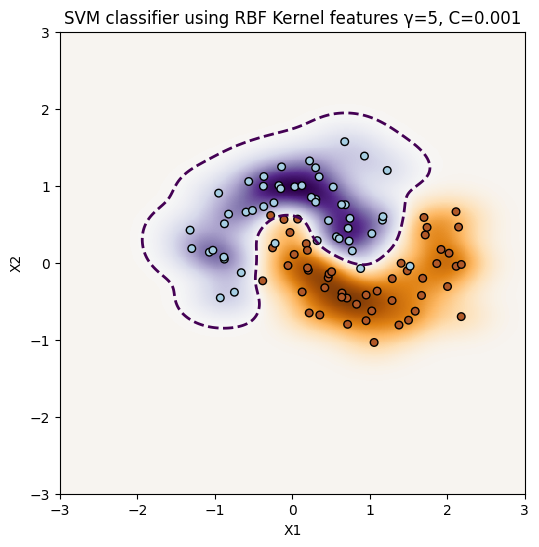

In [ ]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=5, C=0.001')

### RBF Kernel ( with gamma=5, C=1000)

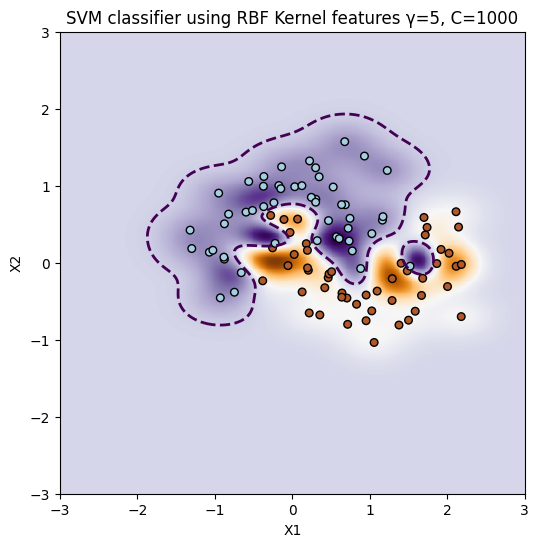

In [ ]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=5, C=1000')

### Applying SVC to the iris dataset with several kernels

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import pandas as pd
# Loading some example data
iris = datasets.load_iris()

In [ ]:
# Import data from the external CSV
irisdata = pd.read_csv('iris.csv')

In [ ]:
irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# select two columns
X=irisdata[['sepal_length', 'sepal_width']].to_numpy()
y=irisdata[['class']].to_numpy()

In [ ]:
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

### Linear Kernel

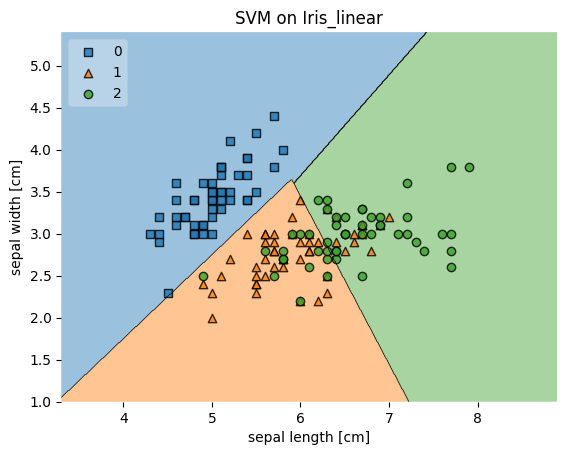

In [ ]:
# Training a classifier
svm = SVC(C=10, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris_linear')
plt.show()

### Sigmoid Kernel

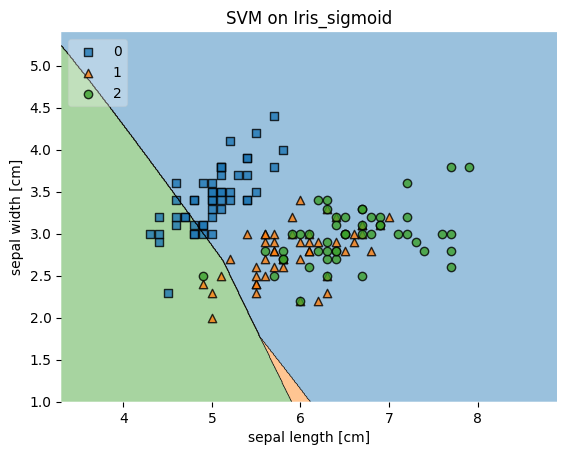

In [ ]:
# Training a classifier
svm = SVC(C=10, kernel='sigmoid')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris_sigmoid')
plt.show()

### RBF Kernel

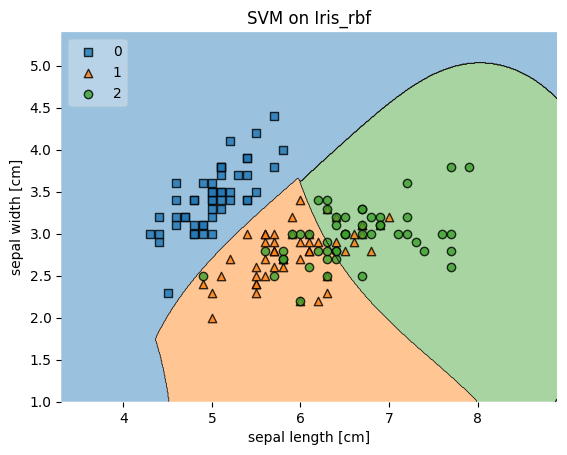

In [ ]:
# Training a classifier
svm = SVC(C=10, kernel='rbf')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris_rbf')
plt.show()

### Polynomial Kernel

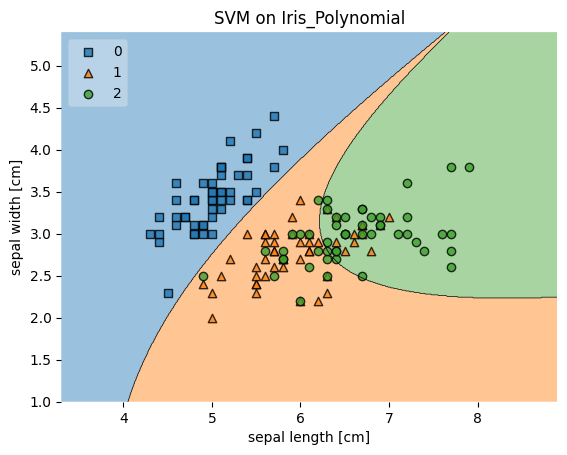

In [ ]:
# Training a classifier
svm = SVC(C=10, kernel='poly')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris_Polynomial')
plt.show()

In [ ]:
# Separate features and labels
X = irisdata.drop('class', axis=1)
y = irisdata['class']

In [ ]:
kernals = ['Polynomial', 'RBF', 'Sigmoid', 'linear']

# A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

    # Train a SVC model using different kernal
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)

    # Make prediction
    y_pred = svclassifier.predict(X_test)

    # Evaluate our model

    print("Evaluation:", kernals[i], "kernel")
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")

Evaluation: Polynomial kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30

-------------------------------------------------------
Evaluation: RBF kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

-------------------------------------------------------
Evaluation: Sigmoid kernel
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyper-parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [ ]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### SVR on a toy dataset

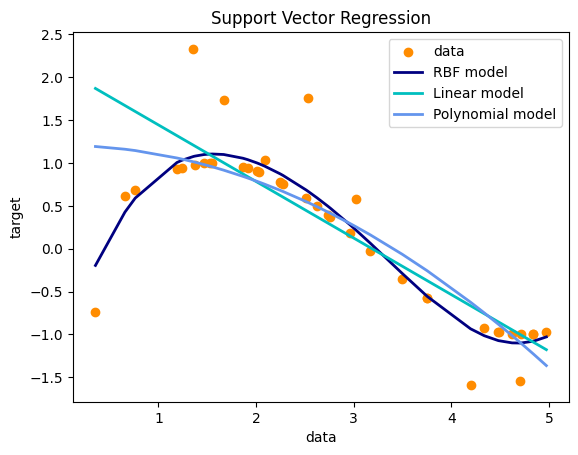

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()


# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))


# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)


# look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
#plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Sources:
- https://github.com/youssefHosni/Practical-Machine-Learning/blob/main/Practical%20Guide%20to%20Support%20Vector%20Machines%20in%20Python%20.ipynb

- https://github.com/clareyan/SVM-Hyper-parameter-Tuning-using-GridSearchCV/blob/master/SVM_Iris.ipynb

- https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html